In [37]:
import pygad
import pandas as pd
import numpy as np

### Read previously constructed matrix

In [38]:
W = pd.read_csv("W_matrix", index_col = 0)
W

,248988936,1229926489,3751686895,4494259533,309168430,253232950,302439065,1145577162,1229926228,348965476,1205501530,10292008863,4692765260,309180217,302407775
248988936,0.0,517.8,539.5,325.0,627.1,508.5,700.6,700.2,733.7,785.2,839.8,382.7,173.1,619.9,505.7
1229926489,538.6,0.0,176.7,601.0,365.8,680.0,629.4,629.0,301.9,331.0,476.7,302.0,468.7,256.8,443.8
3751686895,494.8,109.4,0.0,557.2,475.2,740.7,735.3,734.9,296.3,347.8,492.0,258.2,424.9,347.0,549.7
4494259533,322.8,600.2,621.9,0.0,501.7,289.1,602.5,507.9,786.2,731.6,741.9,407.3,151.9,522.0,286.3
309168430,621.2,365.7,442.9,539.3,0.0,495.8,459.0,466.4,462.8,408.2,327.1,496.4,450.3,191.9,259.6
253232950,517.1,681.5,795.9,299.9,495.5,0.0,553.0,444.2,815.8,761.2,771.5,601.6,346.2,551.6,236.2
302439065,691.9,632.7,771.0,610.0,470.6,549.3,0.0,194.0,790.9,736.3,746.6,583.5,521.0,526.7,313.1
1145577162,689.7,630.5,768.8,518.7,468.4,444.2,199.2,0.0,788.7,734.1,744.4,581.3,518.8,524.5,278.6
1229926228,760.8,304.8,266.0,789.9,464.7,818.0,781.2,788.6,0.0,180.3,336.8,524.2,690.9,295.6,581.8
348965476,804.4,333.3,309.6,734.1,408.9,762.2,725.4,732.8,183.2,0.0,237.4,567.8,658.9,239.8,526.0


In [39]:
#encode data as dict for convenience
#it will allow to define gene_space easily
encoded = {}

for num, col in enumerate(W.columns):
    encoded[num] = col

In [40]:
#main part of genetic algorithm
def fitness_func(ga_instance, solution, solution_idx):
    if len(set(solution)) != len(encoded):           #in case that there are genes duplicates
        return -10000000                             #(which should not happen)
    
    dists = [W.loc[int(encoded[solution[i]]), encoded[solution[i + 1]]] for i in range(len(solution) - 1)]
    return -np.sum(dists)                            #- because we have to optimize

# Set GA parameters and initialize

In [41]:
num_generations = 5000
num_parents_mating = 4

fitness_function = fitness_func

sol_per_pop = 10
num_genes = len(encoded)

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 20                          #yields better results than more conservative approach

gene_space = [i for i in encoded.keys()]

In [42]:
def on_gen(ga_instance):
    print("Generation : ", ga_instance.generations_completed)
    print("Fitness of the best solution :", ga_instance.best_solution()[1])
    print("The best solution :", ga_instance.best_solution()[0])

In [43]:
# the best population so far scores -3183

initial_pop = np.array([ 4., 13., 10.,  9.,  8.,  2.,  1., 11.,  0., 12.,  3.,  5., 14.,7.,  6.]).reshape(1, 15)
initial_pop
initial_pop = np.repeat(initial_pop, 10, axis=0)

In [44]:
ga_instance = pygad.GA(#initial_population = initial_pop,        uncomment if providing initial population
                        num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       #on_generation = on_gen,                  uncomment if learning output is desired
                       gene_space = gene_space,
                       allow_duplicate_genes=False)

In [45]:
#ga_instance.initial_population

# Get solution

### After correct initialization running is trivial

In [46]:
ga_instance.run()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


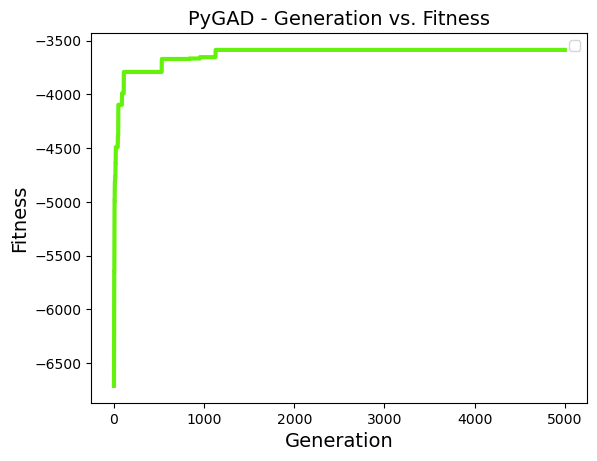

In [47]:
_ = ga_instance.plot_fitness()

# Solution visualization

In [48]:
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt

G = ox.graph_from_place('Wawer, Warsaw, Masovian Voivodeship, Poland', network_type='drive', simplify=False)
G = ox.add_edge_speeds(G) #Impute
G = ox.add_edge_travel_times(G) #Travel time

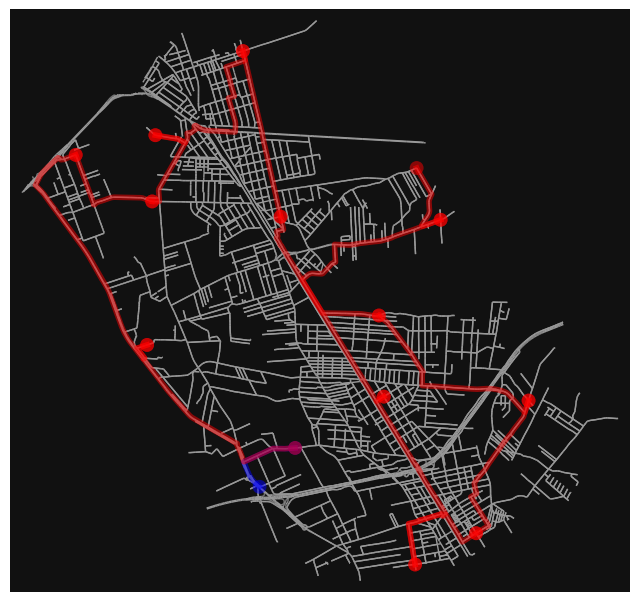

In [49]:
solution = ga_instance.best_solution()[0]

full_route = []
#plot the beginning in blue
colors = ["b"] + ["r" for _ in range(1,14)]

for i in range(len(solution) - 1):
    origin_node = encoded[solution[i]]
    destination_node = encoded[solution[i + 1]]
    
    route = nx.shortest_path(G, int(origin_node), int(destination_node), weight='travel_time')
    full_route.append(route)


fig, ax = ox.plot_graph_routes(G, full_route, route_colors=colors,route_linewidths = 4, node_size = 0)